# Lista 02

### Grupo:

- Dayvison
- Nathan 
- Vinícius
- Jonas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import np_utils

from Perceptron_ import *
from nn import *

sns.set_style('whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Questão 01

$\hspace{0.5cm}$Implemente uma Rede Neural Artificial que faça a predição se um passageiro sobreviveu ou
não ao acidente do Titanic. Embora houvesse algum elemento de sorte envolvido na
sobrevivência dos envolvidos, aparentemente alguns grupos de pessoas tinham mais
probabilidade de sobreviver do que outros. Neste exercício, você deve tentar criar um modelo
preditivo, usando os dados de passageiros (ou seja, nome, idade, sexo, classe
socioeconômica, etc.), que procure responder à pergunta: "que tipo de pessoa tem mais
probabilidade de sobreviver?" A base de dados do problema pode ser acessada através do
seguinte link: <a href="https://www.kaggle.com/c/titanic/data"> Titanic | Kaggle </a></p>

### Train Dataset

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Frequency'>

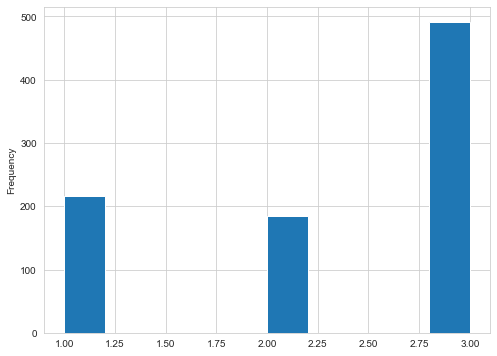

In [6]:
plt.figure(figsize=(8,6))
train['Pclass'].plot(kind='hist')

<AxesSubplot:>

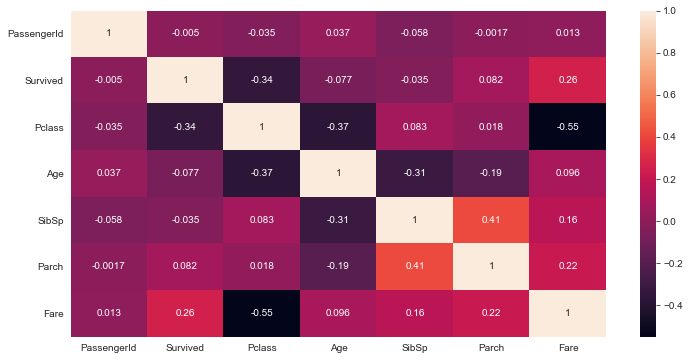

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), annot=True)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
new_train = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked','SibSp','Parch','Age'])
new_train = new_train[['Sex','Fare','Pclass','Survived']]

In [10]:
new_train['Sex'] = new_train['Sex'].apply(lambda x: 1 if x=='female' else 0)

<AxesSubplot:xlabel='Sex', ylabel='count'>

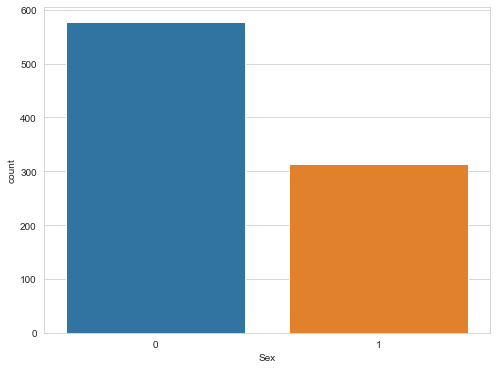

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=new_train)

In [12]:
new_train.head()

,Sex,Fare,Pclass,Survived
0,0,7.2500,3,0
1,1,71.2833,1,1
2,1,7.9250,3,1
3,1,53.1000,1,1
4,0,8.0500,3,0


### Test Dataset

In [13]:
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
gender['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [15]:
new_test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked','SibSp','Parch','Age'])
new_test = new_test[['Sex','Fare','Pclass']]

In [16]:
new_test['Sex'] = new_test['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [17]:
for i in range(len(new_test['Fare'].reset_index().drop(columns=['index'])['Fare'].isnull())):
    if new_test['Fare'].reset_index().drop(columns=['index'])['Fare'].isnull()[i] == True:
        print(new_test['Fare'].reset_index().drop(columns=['index'])['Fare'].index[i])

152


In [18]:
new_test.iloc[152]

Sex       0.0
Fare      NaN
Pclass    3.0
Name: 152, dtype: float64

<AxesSubplot:ylabel='Frequency'>

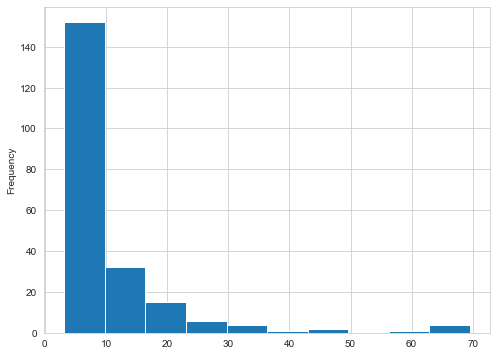

In [19]:
plt.figure(figsize=(8,6))
new_test[new_test['Pclass'] == 3]['Fare'].plot(kind='hist')

In [20]:
values = {'Fare': int(new_test[new_test['Pclass'] == 3]['Fare'].mode()[0])}

new_test = new_test.fillna(value=values)

In [21]:
new_test.isnull().sum()

Sex       0
Fare      0
Pclass    0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

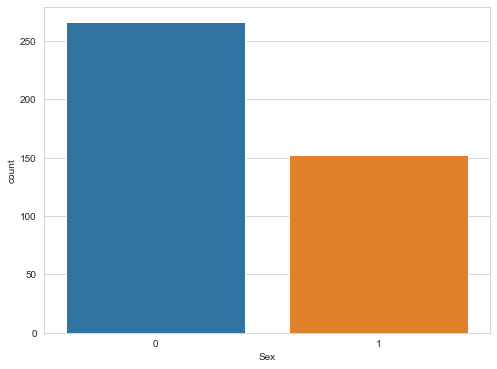

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=new_test)

In [23]:
new_test.head()

,Sex,Fare,Pclass
0,0,7.8292,3
1,1,7.0000,3
2,0,9.6875,2
3,0,8.6625,3
4,1,12.2875,3


### Normalização

In [24]:
scale = MinMaxScaler()
X_train = scale.fit_transform(new_train.drop(columns=['Survived']))
y_train = new_train['Survived'].values

In [25]:
X_test = scale.fit_transform(new_test.values)
y_test = gender['Survived'].values

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(X_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
28/28 [==============================] - 1s 6ms/step - loss: 0.6578 - accuracy: 0.6779 - val_loss: 0.5933 - val_accuracy: 1.0000
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7778 - val_loss: 0.4966 - val_accuracy: 1.0000
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7868 - val_loss: 0.4036 - val_accuracy: 1.0000
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7767 - val_loss: 0.3280 - val_accuracy: 1.0000
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7868 - val_loss: 0.2916 - val_accuracy: 1.0000
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7823 - val_loss: 0.2659 - val_accuracy: 1.0000
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7868 - val_loss: 0.2682 - val_accuracy: 1.0000
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7879 - val_loss: 0.2716 - val_accuracy: 0.9354
Epoch 60/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7890 - val_loss: 0.2793 - val_accuracy: 0.8278
Epoch 61/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7980 - val_loss: 0.2685 - val_accuracy: 0.9809
Epoch 62/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.7823 - val_loss: 0.2659 - val_accuracy: 0.9904
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7969 - val_loss: 0.2726 - val_accuracy: 0.8278
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7924 - val_loss: 0.2768 - val_accuracy: 0.8278
Epoch 65/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8047 - val_loss: 0.2660 - val_accuracy: 0.9904
Epoch 

In [28]:
dim_entrada = X_train.shape[1]
dim_saida = y_train.reshape(-1,1).shape[1]

In [29]:
modelo_ = NeuralNetwork(func_cost=cross_entropy, learning_rate=1e-2)

modelo_.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=50, activation=relu))
modelo_.layers.append(Layer(dim_entrada=50, dim_saida=30, activation=relu))
modelo_.layers.append(Layer(dim_entrada=30, dim_saida=dim_saida, activation=sigmoid))

modelo_.fit(X_train,y_train.reshape(-1,1), epochs=5000, verbose=500)
y_pred_ = modelo_.predict(X_test)

epoch:    0/5000 loss_train: 2.53196890
epoch:  500/5000 loss_train: 0.43898514
epoch: 1000/5000 loss_train: 0.43725318
epoch: 1500/5000 loss_train: 0.43649353
epoch: 2000/5000 loss_train: 0.43554435
epoch: 2500/5000 loss_train: 0.43484097
epoch: 3000/5000 loss_train: 0.43436456
epoch: 3500/5000 loss_train: 0.43395403
epoch: 4000/5000 loss_train: 0.43360982
epoch: 4500/5000 loss_train: 0.43329720
epoch: 5000/5000 loss_train: 0.43301329


## Rede Implementada

Reporte: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       266
           1       1.00      0.91      0.95       152

    accuracy                           0.97       418
   macro avg       0.97      0.95      0.96       418
weighted avg       0.97      0.97      0.97       418


Matriz de Confusão: 



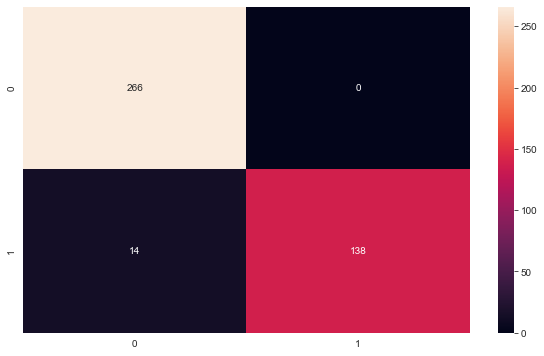

In [38]:
for i in range(len(y_pred_)):
    if y_pred_[i,0] > 0.5:
        y_pred_[i,0] = 1
    else:
        y_pred_[i,0] = 0
        
print('Reporte: \n')
print(classification_report(y_test,y_pred_))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred_), annot=True,fmt="d")
plt.show()

## Rede Keras

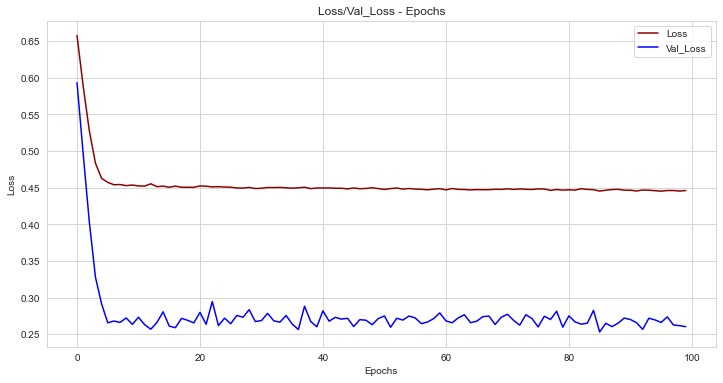

In [31]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='darkred', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

Reporte: 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       266
           1       1.00      0.95      0.98       152

    accuracy                           0.98       418
   macro avg       0.99      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418


Matriz de Confusão: 



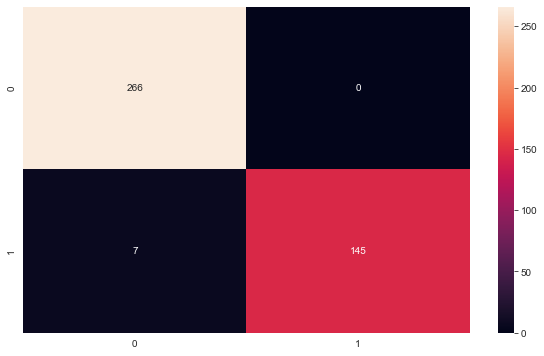

In [37]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i,0] > 0.5:
        y_pred[i,0] = 1
    else:
        y_pred[i,0] = 0

print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d")
plt.show()

## Questão 02

$\hspace{0.5cm}$Implementar duas redes neurais artificiais para o problema de classificação de dígitos
escritos à mão utilizando a base de dados do MNIST, disponível em: <a href="http://yann.lecun.com/exdb/mnist"> Mnist </a></p>
$\hspace{0.5cm}$A primeira rede deve ser uma rede neural perceptron de múltiplas camadas clássica, e a segunda deve ser uma Rede Neural Convolucional (CNN). Compare o desempenho das duas redes analisando a curva de erro médio e a matriz de
confusão.

In [ ]:
import mnist
from sklearn.preprocessing import OneHotEncoder

images_train, labels_train = mnist.train_images(), mnist.train_labels()
images_test, labels_test = mnist.test_images(), mnist.test_labels()

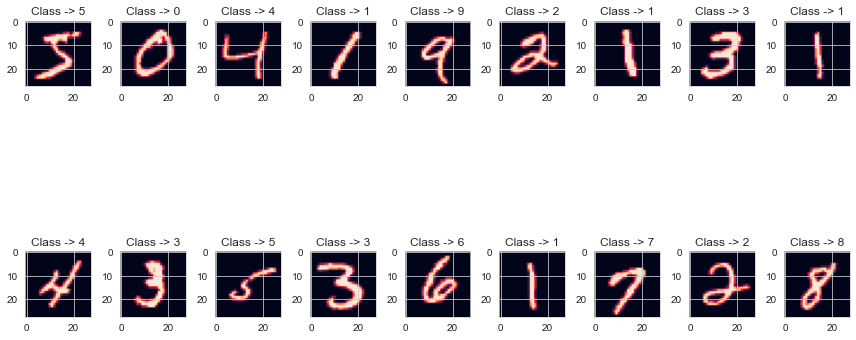

In [ ]:
rows = 2
cols = 9
axes = []
fig = plt.figure(figsize=(12,8))

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title = ("Class -> "+str(labels_train[:20][a]))
    axes[-1].set_title(subplot_title)
    plt.imshow(images_train[a])
    

fig.tight_layout()

In [ ]:
n_instancias_treino = images_train.shape[0]
n_instancias_teste = images_test.shape[0]

print(f'Quantidade de instâncias(treino): {n_instancias_treino} \tQuantidade de instâncias(test): {n_instancias_teste} \n')
print(f'Todas as imagens possuem o shape: {images_train.shape[1:]}\n')
print(f'Shape dos labels do treino: {labels_train.shape}\tShape dos labels do test: {labels_test.shape}')

Quantidade de instâncias(treino): 60000 	Quantidade de instâncias(test): 10000 

Todas as imagens possuem o shape: (28, 28)

Shape dos labels do treino: (60000,)	Shape dos labels do test: (10000,)


In [ ]:
labels_train = np.array(labels_train).reshape(-1,1)
labels_test = np.array(labels_test).reshape(-1,1)
images_train = np.array(images_train)
images_test = np.array(images_test)

Após o reshape de (-1,1) nos labels, temos um shape de (60000,1) no treino e (10000,1) no teste

In [ ]:
print(f'Novo shape dos labels do treino: {labels_train.shape}\tNovo shape dos labels do test: {labels_test.shape}')

Novo shape dos labels do treino: (60000, 1)	Novo shape dos labels do test: (10000, 1)


In [ ]:
one = OneHotEncoder(sparse=False)

labels_train = one.fit_transform(labels_train)
labels_test = one.fit_transform(labels_test)

In [ ]:
labels_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Para passarmos para a rede clássica, demos um reshape nas imagens, para ter 784 colunas

In [ ]:
images_train = images_train.reshape(images_train.shape[0],28*28)/255.0
images_test = images_test.reshape(images_test.shape[0],28*28)/255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(images_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    
])

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_test,labels_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3208 - accuracy: 0.9048 - val_loss: 0.1752 - val_accuracy: 0.9469
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1426 - accuracy: 0.9574 - val_loss: 0.1160 - val_accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1076 - accuracy: 0.9672 - val_loss: 0.1012 - val_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0903 - accuracy: 0.9721 - val_loss: 0.1079 - val_accuracy: 0.9660
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0922 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0651 - accuracy: 0.9801 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0893 - val_accuracy:

Para a rede convolucional, precisamos dar um reshape nas imagens, ficando assim (60000,28,28,1) no treino e (10000,28,28,1) no teste

In [ ]:
images_train = images_train.reshape(images_train.shape[0],28,28,1)
images_test = images_test.reshape(images_test.shape[0],28,28,1)

In [ ]:
model_ = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, (5,5), padding='same', input_shape=(28,28,1), kernel_initializer="normal", activation='relu', 
                           kernel_regularizer=tf.keras.regularizers.l1(0.01)),
     
     tf.keras.layers.MaxPooling2D((2,2)),
    
     tf.keras.layers.Flatten(),
     
     tf.keras.layers.Dense(50, activation='relu', kernel_initializer="normal"),
     tf.keras.layers.Dense(30, activation='relu', kernel_initializer="normal"),
     tf.keras.layers.Dense(10, activation='softmax')
])
model_.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
history_ = model_.fit(images_train, labels_train, epochs=10, validation_data=(images_test,labels_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4059 - accuracy: 0.9070 - val_loss: 0.2254 - val_accuracy: 0.9524
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1973 - accuracy: 0.9589 - val_loss: 0.1574 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1518 - accuracy: 0.9681 - val_loss: 0.1305 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1254 - accuracy: 0.9743 - val_loss: 0.1149 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1109 - accuracy: 0.9758 - val_loss: 0.1001 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1004 - accuracy: 0.9787 - val_loss: 0.0990 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0925 - accuracy: 0.9804 - val_loss: 0.0878 - val_ac

## Rede Clássica

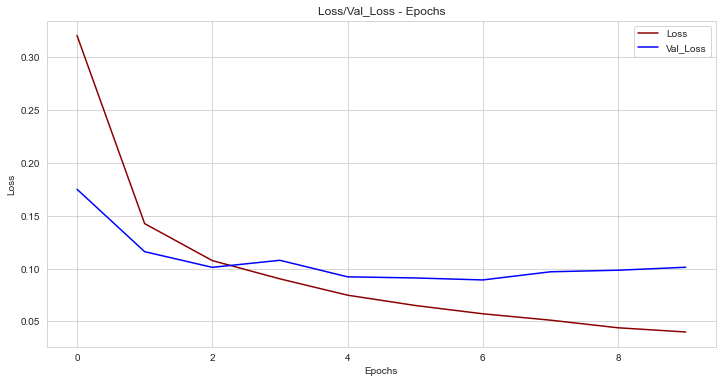

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='darkred', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

Reporte: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.95      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.96      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de Confusão: 



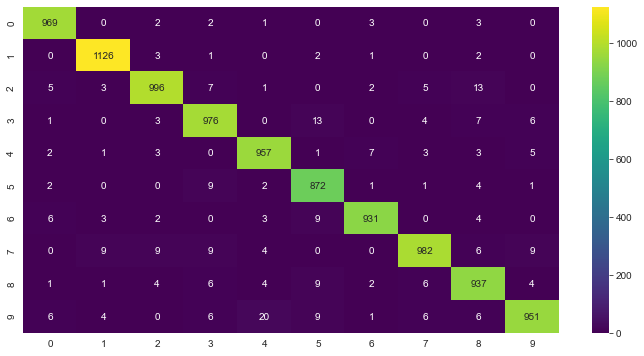

In [ ]:
y_pred = np.argmax(model.predict(images_test.reshape(images_test.shape[0],28*28)), axis=1)
y_test = np.argmax(labels_test, axis=1)

print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d", cmap='viridis')
plt.show()

## Rede Convolucional

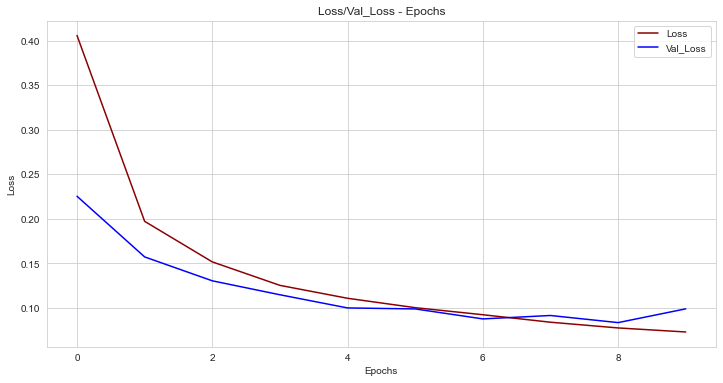

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_.history['loss'], color='darkred', label='Loss')
plt.plot(history_.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

Reporte: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.91      0.98      0.94       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de Confusão: 



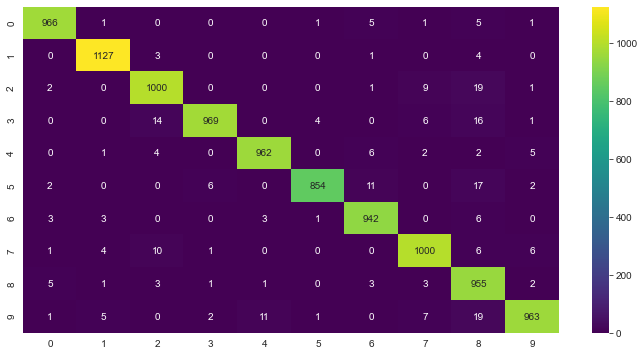

In [ ]:
y_pred_ = np.argmax(model_.predict(images_test), axis=1)

print('Reporte: \n')
print(classification_report(y_test,y_pred_))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred_), annot=True,fmt="d", cmap='viridis')
plt.show()

### Imagens classificadas incorretamente

In [ ]:
indices = []

for i in range(len(y_pred)):
    if y_pred[i]!=y_pred_[i]:
        indices.append(i)

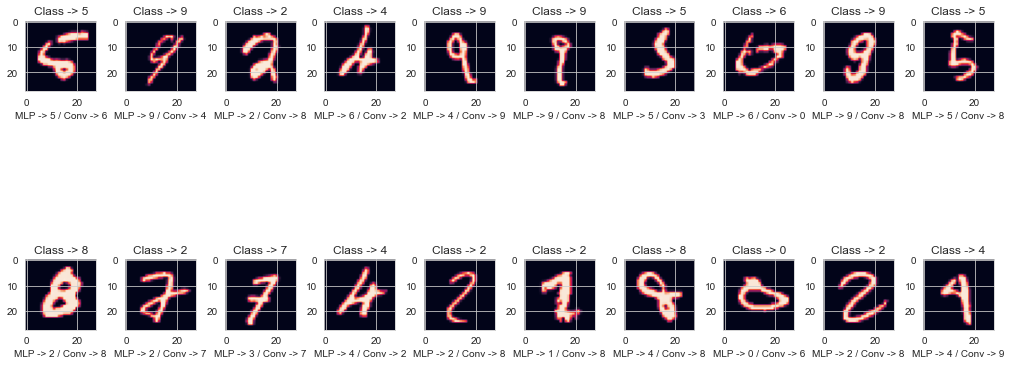

In [ ]:
rows = 2
cols = 10
axes = []
fig = plt.figure(figsize=(14,8))
a = 0

for i in indices[:rows*cols]:
    
    axes.append( fig.add_subplot(rows, cols, a+1) )
    
    subplot_title = ("Class -> "+str(labels_test[i][0]))
    axes[-1].set_title(subplot_title)
    
    x_label = ("MLP -> "+str(y_pred[i])+" / "+"Conv -> "+str(y_pred_[i]))
    axes[-1].set_xlabel(x_label)
    
    a = a + 1
    
    plt.imshow(images_test.reshape(images_test.shape[0],28,28,1)[i])
    

fig.tight_layout()

## Questão 03

$\hspace{0.5cm}$Implemente uma CNN para resolver o problema de classificação de objetos em imagens
utilizando a base de dados CIFAR-10, disponível: <a href="https://www.cs.toronto.edu/~kriz/cifar.html"> CIFAR-10 </a></p>

$\hspace{0.5cm}$Apresente também a curva do erro médio e a matriz de confusão do modelo treinado.

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

In [4]:
def change(images):
    raw = np.array(images, dtype = float) / 255.0
    images = raw.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])

    return images
  
def load(arquivo):
    data = unpickle(arquivo)
    images_array = data[b'data']
  
    images = change(images_array)
    labels = np.array(data[b'labels'])
    
    return images, labels

def test():
    images, labels = load('/content/drive/My Drive/cifar-10-batches-py/test_batch')
    
    return images, labels, np_utils.to_categorical(labels,10)

def train():
    images = np.zeros(shape=[50000, 32, 32, 3], dtype = float)
    labels = np.zeros(shape=[50000], dtype = int)
    
    inicio = 0
    
    for i in range(5):
    
        images_batch, labels_batch = load(f'/content/drive/My Drive/cifar-10-batches-py/data_batch_{i+1}')
      
        final = inicio + 10000
        
        images[inicio:final,:] = images_batch        
        labels[inicio:final] = labels_batch
        
        inicio = final
    
    return images, labels, np_utils.to_categorical(labels,10)


images_train, labels_train, class_train = train()
images_test, labels_test, class_test = test()

In [18]:
data = unpickle(f'/content/drive/My Drive/cifar-10-batches-py/batches.meta')

In [24]:
data[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [25]:
name_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

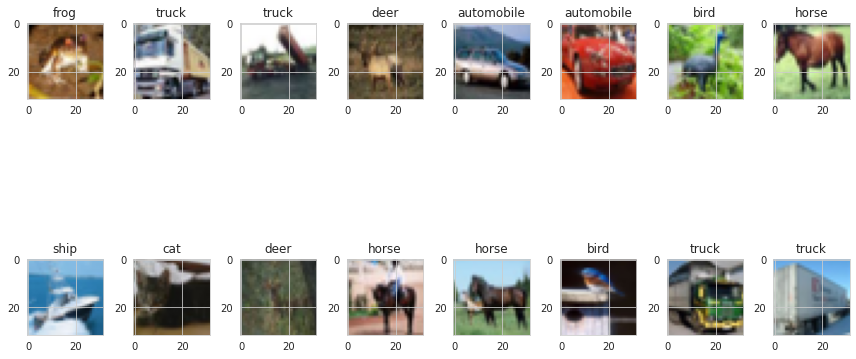

In [29]:
rows = 2
cols = 8
axes = []
fig = plt.figure(figsize=(12,8))

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title = (str(name_labels[labels_train[a]]))
    axes[-1].set_title(subplot_title)
    plt.imshow(images_train[a])
    

fig.tight_layout()

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (3,3), padding='same', input_shape=(32,32,3), activation='relu'), ## padding com zeros
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(96, (3,3), padding='same',  activation='relu'),
    tf.keras.layers.Conv2D(96, (3,3), padding='same',  activation='relu', strides=2), ## 2 passos
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu', strides=2), 
    tf.keras.layers.Dropout(0.5),
  
    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(192, (1,1), padding='valid', activation='relu'), ## no padding
    tf.keras.layers.Conv2D(10, (1,1), padding='valid', activation='relu'), 
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [31]:
history = model.fit(images_train, class_train, epochs=100, batch_size=128,validation_data=(images_test,class_test))

Epoch 1/100
391/391 [==============================] - 82s 128ms/step - loss: 2.0965 - accuracy: 0.2218 - val_loss: 1.8545 - val_accuracy: 0.3284
Epoch 2/100
391/391 [==============================] - 48s 124ms/step - loss: 1.7715 - accuracy: 0.3508 - val_loss: 1.6548 - val_accuracy: 0.3929
Epoch 3/100
391/391 [==============================] - 48s 124ms/step - loss: 1.6230 - accuracy: 0.4024 - val_loss: 1.5412 - val_accuracy: 0.4406
Epoch 4/100
391/391 [==============================] - 48s 124ms/step - loss: 1.5371 - accuracy: 0.4359 - val_loss: 1.4628 - val_accuracy: 0.4682
Epoch 5/100
391/391 [==============================] - 48s 124ms/step - loss: 1.4791 - accuracy: 0.4593 - val_loss: 1.4035 - val_accuracy: 0.4911
Epoch 6/100
391/391 [==============================] - 48s 124ms/step - loss: 1.4228 - accuracy: 0.4801 - val_loss: 1.3793 - val_accuracy: 0.5033
Epoch 7/100
391/391 [==============================] - 48s 124ms/step - loss: 1.3798 - accuracy: 0.4976 - val_loss: 1.3578 -

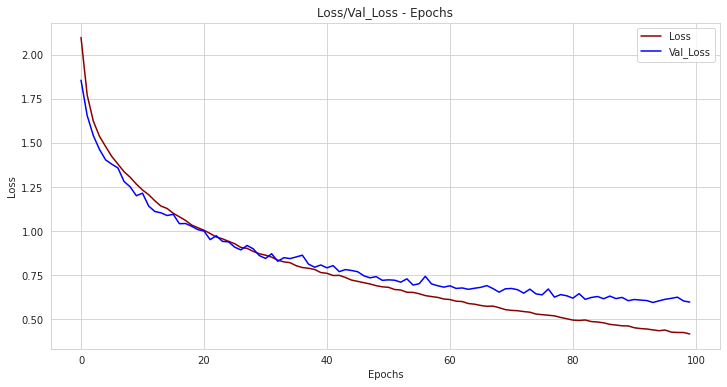

In [32]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='darkred', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

Reporte: 

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.91      0.91      0.91      1000
           2       0.73      0.73      0.73      1000
           3       0.57      0.73      0.64      1000
           4       0.80      0.75      0.78      1000
           5       0.80      0.62      0.70      1000
           6       0.85      0.82      0.84      1000
           7       0.85      0.82      0.83      1000
           8       0.89      0.90      0.90      1000
           9       0.87      0.89      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000


Matriz de Confusão: 



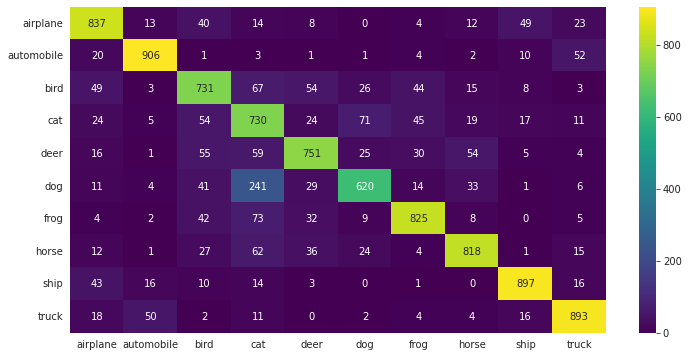

In [35]:
y_pred = np.argmax(model.predict(images_test), axis=1)
y_test = np.argmax(class_test,axis=1)

print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d", cmap='viridis', xticklabels=name_labels, yticklabels=name_labels)
plt.show()